# PSF - Trabajo Practico No. 2

## Grafique las siguientes se#ales con su espectro en frecuencia.

### Senoidal, Cuadrada, Triangular, Delta en t=0

fs = 100, N = 100, signalFrec = 4

### Frecuencia 4 Hz

### Amplitud 1

### Numero de muestras 100

### Frecuencia de Sampleo 100 Hz

### Densidad de potencia Espectral = A^2 / 2 = 1 ^ 2 / 2 = 0,5 W


#### La densidad de potencia espectral se distribuye distinto en cada forma de onda, se puede obervar en el grafico.
#### Por ejemplo, la senoidal tiene picos completos en su frecuencia central, mientras que una cuadrada tiene sus picos, que van disminuyendo su potencia en los armonicos impares.


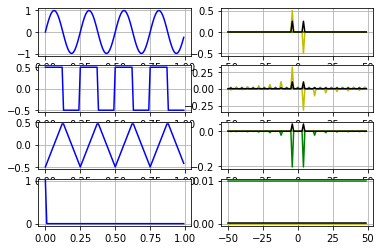

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sci
from matplotlib.animation import FuncAnimation


#%matplotlib qt
#matplotlib notebook
%matplotlib inline


#--------------------------------------
fig        = plt.figure()
fs         = 100
N          = 100
frecIter   = 0
signalFrec = 4
#--------------------------------------
tData      = np.arange(0,N/fs,1/fs)
nData      = np.arange(0,N,1)
circleFrec = np.arange(-fs/2,fs/2,fs/N)

#------------SIGNALS--------------------------

# SENOIDAL
signal1Data = np.sin(2*np.pi*signalFrec*nData*1/fs)

# CUADRADA
signal2Data = 0.5*sci.square(signalFrec*(nData/fs)*(2*np.pi),0.5)

# TRIANGULAR
signal3Data = 0.5*sci.sawtooth(signalFrec*(nData/fs)*(2*np.pi),0.5)

# DELTA ent=0
delta=np.zeros(N)
delta[0]=1
signal4Data = delta

signalAxe1  = fig.add_subplot(4,2,1)
signalRLn1, = plt.plot(tData,np.real(signal1Data),'b-')
signalAxe1.grid(True)

signalAxe2  = fig.add_subplot(4,2,3)
signalRLn2, = plt.plot(tData,np.real(signal2Data),'b-')
signalAxe2.grid(True)

signalAxe3  = fig.add_subplot(4,2,5)
signalRLn3, = plt.plot(tData,np.real(signal3Data),'b-')
signalAxe3.grid(True)

signalAxe4  = fig.add_subplot(4,2,7)
signalRLn4, = plt.plot(tData,np.real(signal4Data),'b-')
signalAxe4.grid(True)
#------------FFT IFFT-----------------------
fftData1  = np.fft.fft(signal1Data)
#ifftData1 = np.fft.ifft(fftData1)
fftData1  = np.concatenate((fftData1[N//2:N],fftData1[0:N//2]))/N

fftData2  = np.fft.fft(signal2Data)
#ifftData2 = np.fft.ifft(fftData2)
fftData2  = np.concatenate((fftData2[N//2:N],fftData2[0:N//2]))/N

fftData3  = np.fft.fft(signal3Data)
#ifftData3 = np.fft.ifft(fftData3)
fftData3  = np.concatenate((fftData3[N//2:N],fftData3[0:N//2]))/N

fftData4  = np.fft.fft(signal4Data)
#ifftData4 = np.fft.ifft(fftData4)
fftData4  = np.concatenate((fftData4[N//2:N],fftData4[0:N//2]))/N


#-----------FFT---------------------------
fftAxe1                 = fig.add_subplot(4,2,2)
fftRLn1,fftILn1,fftAbsLn1 = plt.plot(circleFrec,np.real(fftData1),'g-' ,circleFrec,np.imag(fftData1),'y-' ,circleFrec,np.abs(fftData1)**2,'k-')
fftAxe1.grid(True)

fftAxe2                 = fig.add_subplot(4,2,4)
fftRLn2,fftILn2,fftAbsLn2 = plt.plot(circleFrec,np.real(fftData2),'g-' ,circleFrec,np.imag(fftData2),'y-' ,circleFrec,np.abs(fftData2)**2,'k-')
fftAxe2.grid(True)

fftAxe3                 = fig.add_subplot(4,2,6)
fftRLn3,fftILn3,fftAbsLn3 = plt.plot(circleFrec,np.real(fftData3),'g-' ,circleFrec,np.imag(fftData3),'y-' ,circleFrec,np.abs(fftData3)**2,'k-')
fftAxe3.grid(True)

fftAxe4                = fig.add_subplot(4,2,8)
fftRLn4,fftILn4,fftAbsLn4 = plt.plot(circleFrec,np.real(fftData4),'g-' ,circleFrec,np.imag(fftData4),'y-' ,circleFrec,np.abs(fftData4)**2,'k-')
fftAxe4.grid(True)



plt.show()

## Transformada discreta de Fourier


### Resolución espectral

Con 100 muestras y frecuencia de sampleo en 200 Hz, la resolucion espectral es de 2 Hz

### Obtenga el contenido espectral

Se ve en el grafico de la celda a continuacion.

### Que técnica conoce para mejorar la resolución en frecuencia?

Podemos aplicar ZERO PADDING.
Completando CEROS aumento la resolucion espectral pero reparto la potencia en mas casilleros de frecuencia.

### Aplique la técnica, grafique y comente los resultados

Se ve en la segunda celda a continuacion.

Una vez aplicada la tecnica aparecen se ven mas componentes de frecuencia, dado que aumenta la resolucion espectral.



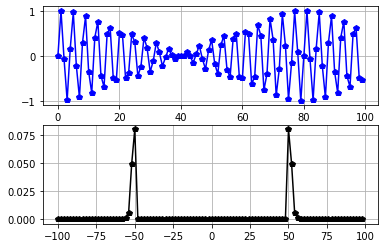

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sci
from matplotlib.animation import FuncAnimation


#matplotlib qt
#%matplotlib notebook
%matplotlib inline

fs         = 200
N          = 100
fig        = plt.figure()


# ---------------------------------- SE#AL  --------------------------------------
datos = [
0.00000000e+00	,	9.98458667e-01	,	-7.82172325e-02	,	-9.86184960e-01	,
1.54508497e-01	,	9.61939766e-01	,	-2.26995250e-01	,	-9.26320082e-01	,
2.93892626e-01	,	8.80202983e-01	,	-3.53553391e-01	,	-8.24724024e-01	,
4.04508497e-01	,	7.61249282e-01	,	-4.45503262e-01	,	-6.91341716e-01	,
4.75528258e-01	,	6.16722682e-01	,	-4.93844170e-01	,	-5.39229548e-01	,
5.00000000e-01	,	4.60770452e-01	,	-4.93844170e-01	,	-3.83277318e-01	,
4.75528258e-01	,	3.08658284e-01	,	-4.45503262e-01	,	-2.38750718e-01	,
4.04508497e-01	,	1.75275976e-01	,	-3.53553391e-01	,	-1.19797017e-01	,
2.93892626e-01	,	7.36799178e-02	,	-2.26995250e-01	,	-3.80602337e-02	,
1.54508497e-01	,	1.38150398e-02	,	-7.82172325e-02	,	-1.54133313e-03	,
1.83758918e-15	,	1.54133313e-03	,	7.82172325e-02	,	-1.38150398e-02	,
-1.54508497e-01	,	3.80602337e-02	,	2.26995250e-01	,	-7.36799178e-02	,
-2.93892626e-01	,	1.19797017e-01	,	3.53553391e-01	,	-1.75275976e-01	,
-4.04508497e-01	,	2.38750718e-01	,	4.45503262e-01	,	-3.08658284e-01	,
-4.75528258e-01	,	3.83277318e-01	,	4.93844170e-01	,	-4.60770452e-01	,
-5.00000000e-01	,	5.39229548e-01	,	4.93844170e-01	,	-6.16722682e-01	,
-4.75528258e-01	,	6.91341716e-01	,	4.45503262e-01	,	-7.61249282e-01	,
-4.04508497e-01	,	8.24724024e-01	,	3.53553391e-01	,	-8.80202983e-01	,
-2.93892626e-01	,	9.26320082e-01	,	2.26995250e-01	,	-9.61939766e-01	,
-1.54508497e-01	,	9.86184960e-01	,	7.82172325e-02	,	-9.98458667e-01	,
5.63708916e-15	,	9.98458667e-01	,	-7.82172325e-02	,	-9.86184960e-01	,
1.54508497e-01	,	9.61939766e-01	,	-2.26995250e-01	,	-9.26320082e-01	,
2.93892626e-01	,	8.80202983e-01	,	-3.53553391e-01	,	-8.24724024e-01	,
4.04508497e-01	,	7.61249282e-01	,	-4.45503262e-01	,	-6.91341716e-01	,
4.75528258e-01	,	6.16722682e-01	,	-4.93844170e-01	,	-5.39229548e-01	,
]

signalAxe1  = fig.add_subplot(2,1,1)
signalRLn1, = plt.plot(datos,'b-p')
signalAxe1.grid(True)

circleFrec = np.arange(-fs/2,fs/2,fs/N)

#------------FFT IFFT-----------------------
fftData1  = np.fft.fft(datos)
#ifftData1 = np.fft.ifft(fftData1)
fftData1  = np.concatenate((fftData1[N//2:N],fftData1[0:N//2]))/N

#-----------FFT Grafico ---------------------------
fftAxe1                 = fig.add_subplot(2,1,2)
#fftRLn1,fftILn1,fftAbsLn1 = plt.plot(circleFrec,np.real(fftData1),'g-' ,circleFrec,np.imag(fftData1),'y-' ,circleFrec,np.abs(fftData1)**2,'k-')
#fftRLn1,fftAbsLn1 = plt.plot(circleFrec,np.real(fftData1),'g-' ,circleFrec,np.abs(fftData1)**2,'k-')
fftAbsLn1 = plt.plot(circleFrec,np.abs(fftData1)**2,'k-p')
fftAxe1.grid(True)


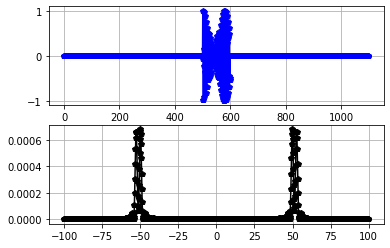

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sci
from matplotlib.animation import FuncAnimation


#matplotlib qt
#matplotlib notebook
%matplotlib inline

fs         = 200
N          = 1100
fig        = plt.figure()


# ---------------------------------- SE#AL  --------------------------------------
datos = [
0.00000000e+00	,	9.98458667e-01	,	-7.82172325e-02	,	-9.86184960e-01	,
1.54508497e-01	,	9.61939766e-01	,	-2.26995250e-01	,	-9.26320082e-01	,
2.93892626e-01	,	8.80202983e-01	,	-3.53553391e-01	,	-8.24724024e-01	,
4.04508497e-01	,	7.61249282e-01	,	-4.45503262e-01	,	-6.91341716e-01	,
4.75528258e-01	,	6.16722682e-01	,	-4.93844170e-01	,	-5.39229548e-01	,
5.00000000e-01	,	4.60770452e-01	,	-4.93844170e-01	,	-3.83277318e-01	,
4.75528258e-01	,	3.08658284e-01	,	-4.45503262e-01	,	-2.38750718e-01	,
4.04508497e-01	,	1.75275976e-01	,	-3.53553391e-01	,	-1.19797017e-01	,
2.93892626e-01	,	7.36799178e-02	,	-2.26995250e-01	,	-3.80602337e-02	,
1.54508497e-01	,	1.38150398e-02	,	-7.82172325e-02	,	-1.54133313e-03	,
1.83758918e-15	,	1.54133313e-03	,	7.82172325e-02	,	-1.38150398e-02	,
-1.54508497e-01	,	3.80602337e-02	,	2.26995250e-01	,	-7.36799178e-02	,
-2.93892626e-01	,	1.19797017e-01	,	3.53553391e-01	,	-1.75275976e-01	,
-4.04508497e-01	,	2.38750718e-01	,	4.45503262e-01	,	-3.08658284e-01	,
-4.75528258e-01	,	3.83277318e-01	,	4.93844170e-01	,	-4.60770452e-01	,
-5.00000000e-01	,	5.39229548e-01	,	4.93844170e-01	,	-6.16722682e-01	,
-4.75528258e-01	,	6.91341716e-01	,	4.45503262e-01	,	-7.61249282e-01	,
-4.04508497e-01	,	8.24724024e-01	,	3.53553391e-01	,	-8.80202983e-01	,
-2.93892626e-01	,	9.26320082e-01	,	2.26995250e-01	,	-9.61939766e-01	,
-1.54508497e-01	,	9.86184960e-01	,	7.82172325e-02	,	-9.98458667e-01	,
5.63708916e-15	,	9.98458667e-01	,	-7.82172325e-02	,	-9.86184960e-01	,
1.54508497e-01	,	9.61939766e-01	,	-2.26995250e-01	,	-9.26320082e-01	,
2.93892626e-01	,	8.80202983e-01	,	-3.53553391e-01	,	-8.24724024e-01	,
4.04508497e-01	,	7.61249282e-01	,	-4.45503262e-01	,	-6.91341716e-01	,
4.75528258e-01	,	6.16722682e-01	,	-4.93844170e-01	,	-5.39229548e-01	,
]

listaZeros = [0] * 500

datos = listaZeros + datos + listaZeros

signalAxe1  = fig.add_subplot(2,1,1)
signalRLn1, = plt.plot(datos,'b-p')
signalAxe1.grid(True)

circleFrec = np.arange(-fs/2,fs/2,fs/N)

#------------FFT IFFT-----------------------
fftData1  = np.fft.fft(datos)
#ifftData1 = np.fft.ifft(fftData1)
fftData1  = np.concatenate((fftData1[N//2:N],fftData1[0:N//2]))/N

#-----------FFT Grafico ---------------------------
fftAxe1                 = fig.add_subplot(2,1,2)
#fftRLn1,fftILn1,fftAbsLn1 = plt.plot(circleFrec,np.real(fftData1),'g-' ,circleFrec,np.imag(fftData1),'y-' ,circleFrec,np.abs(fftData1)**2,'k-')
#fftRLn1,fftAbsLn1 = plt.plot(circleFrec,np.real(fftData1),'g-' ,circleFrec,np.abs(fftData1)**2,'k-')
fftAbsLn1 = plt.plot(circleFrec,np.abs(fftData1)**2,'k-p')
fftAxe1.grid(True)

## Anti transformada discreta de Fourier

### Archivo fft_hjs.npy

1. La se#al representa a HOMERO.

2. Usando un 20% de la informacion de espectro provista, aun se distingue a Homero, aunque en forma bastante deficiente.

#Aclaracion

Hablo de limitar la informacion del espectro provista, en un porcentaje, porque no puedo habler de Frecuencia.
En la informacion no tengo Fs, por lo cual podria ser cualquier frecuencia la que estamos manejando, solo se que tengo 1000 muestras, o sea 1000 bins de frecuencia, y poniendo 800 a CERO, sigo viendo a HOMERO.


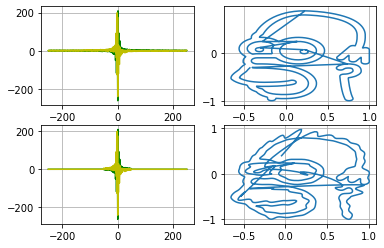

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


#matplotlib qt
#%matplotlib notebook
%matplotlib inline



#--------------------------------------
fig        = plt.figure()
fs         = 500

#--------------------------------------
espectro=np.load("fft_hjs.npy")[::1]
espectro1=np.roll(espectro,500)
espectro2=espectro;
N=len(espectro)
rangoEspectro = np.arange(-fs/2,fs/2,fs/N)

ifftData = np.fft.ifft(espectro)

escpectro_axe                 = fig.add_subplot(2,2,1)
espectro1Real, especto1Imag = plt.plot(rangoEspectro, np.real(espectro1), 'g-' ,rangoEspectro, np.imag(espectro1),'y-')
escpectro_axe.grid(True)

ifft_axe                 = fig.add_subplot(2,2,2)
ifft_data = plt.plot(np.imag(ifftData), np.real(ifftData))
ifft_axe.grid(True)


for x in range(100,900):
    espectro[x] = 0

espectro2=np.roll(espectro,500)

    
ifftData = np.fft.ifft(espectro)    
    
escpectro_axe                 = fig.add_subplot(2,2,3)
espectro1Real, especto1Imag = plt.plot(rangoEspectro, np.real(espectro2), 'g-' ,rangoEspectro, np.imag(espectro2),'y-')
escpectro_axe.grid(True)

ifft_axe                 = fig.add_subplot(2,2,4)
ifft_data = plt.plot(np.imag(ifftData), np.real(ifftData))
ifft_axe.grid(True)



# Convolución

Segun el analisis espectral, a partir de 1500 Hz podriamos cortar sin perder audio.
Arme un filtro con el PYFDAX

Se puede escuchar el audio resultante y ver el espectro una vez convolucionado con el filtro.

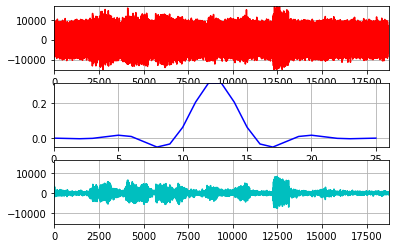

In [1]:
## Filtro 1400 y 2000 IMPLEMENTADO CON PYFDAX

## IMPLEMENTADO CON FOR Y SUMATORIA


#%matplotlib qt
#%matplotlib notebook
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import simpleaudio as sa
from matplotlib.animation import FuncAnimation
from buttons import buttonOnFigure
#--------------------------------------
fig = plt.figure()
fs  = 8000
#N   = 400
#fir,=np.load("low_pass.npy").astype(float)

fir1 = [
    -1.8260039161016835e-05	,
-0.0023133498889108925	,
-0.00722337466197927	,
-0.01437094544580126	,
-0.019954180906153102	,
-0.01732238122412354	,
0.0005827424243871759	,
0.03713812006579999	,
0.08850317106369074	,
0.143081698856503	,
0.1850712350515006	,
0.20085666175495862	,
0.1850712350515006	,
0.143081698856503	,
0.08850317106369074	,
0.03713812006579999	,
0.0005827424243871759	,
-0.01732238122412354	,
-0.019954180906153102	,
-0.01437094544580126	,
-0.00722337466197927	,
-0.0023133498889108925	,
-1.8260039161016835e-05	
]

fir2 = [
-0.00039237828316507795	,
-0.0020141550813268295	,
-0.003713454631189994	,
-0.00146803731603397	,
0.007457410592130842	,
0.016280810226015498	,
0.00918541612276966	,
-0.020911681188605338	,
-0.05104937840928958	,
-0.03364739352284038	,
0.0616094857926864	,
0.20483246215646522	,
0.31296080029791035	,
0.31296080029791035	,
0.20483246215646522	,
0.0616094857926864	,
-0.03364739352284038	,
-0.05104937840928958	,
-0.020911681188605338	,
0.00918541612276966	,
0.016280810226015498	,
0.007457410592130842	,
-0.00146803731603397	,
-0.003713454631189994	,
-0.0020141550813268295	,
-0.00039237828316507795	,
]


fir = fir2
M=len(fir)


#--------------------------------------
segmento_audio=np.load("chapu_noise.npy")[::1]
#segmento_audio=np.roll(segmento_audio,500)
N=len(segmento_audio)
#rangoEspectro = np.arange(-fs/2,fs/2,fs/N)
tiempo = np.arange(0,N/fs,(N/fs) / N)

#--------------------------------------


tData=np.arange(-(M-1),N+(M-1),1)
xData=np.zeros(N+2*(M-1))
xData[M:M+N]=segmento_audio
xAxe  = fig.add_subplot(3,1,1)
xLn,xHighLn  = plt.plot(tData,xData,'r-',[],[],'y-')
xAxe.grid(True)
xAxe.set_xlim(-M,M+N-2)
xAxe.set_ylim(np.min(xData),np.max(xData))


#--------------------------------------
hData=fir
hAxe  = fig.add_subplot(3,1,2)
hLn,  = plt.plot((hData),'b-')
hAxe.grid(True)
hAxe.set_xlim(0,M)
hAxe.set_ylim(np.min(hData),np.max(hData))


#--------------------------------------
def init():
    global yData
    yData=np.zeros(N+2*(M-1))



def update(i):
    global yData
    t=np.linspace(-(M-1)+i,i,M,endpoint=True)
    yData[i]=np.sum(xData[i:i+M]*hData[::-1])
#    xHighLn.set_data(t,xData[i:i+M])
#    hLn.set_data(t,hData[::-1])
#    yLn.set_data(tData,yData)
#    return hLn,xLn,xHighLn,yLn,




init()

for zz in range(M+N-1):
    update(zz)
    

yAxe  = fig.add_subplot(3,1,3)
yLn,  = plt.plot(yData,'c-')
yAxe.grid(True)
yAxe.set_xlim(-M,M+N-1)
yAxe.set_ylim(np.min(xData),np.max(xData))   
    

audio_np = np.array(yData)   
audio = audio_np.astype(np.int16)

for i in range(2):
    play_obj = sa.play_buffer(segmento_audio, 1, 2, fs)
    play_obj.wait_done()
    
for i in range(2):
    play_obj = sa.play_buffer(audio, 1, 2, fs)
    play_obj.wait_done()

plt.show()

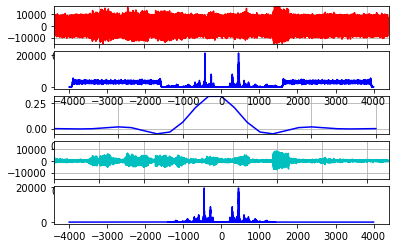

In [1]:
## Filtro 1400 y 2000 IMPLEMENTADO CON PYFDAX

## IMPLEMENTADO CON CONVOLUCION DE PYTHON


#%matplotlib qt
#%matplotlib notebook
%matplotlib inline

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import simpleaudio as sa
from matplotlib.animation import FuncAnimation
from buttons import buttonOnFigure
#--------------------------------------
fig = plt.figure()
fs  = 8000
#N   = 400
#fir,=np.load("low_pass.npy").astype(float)

fir1 = [
    -1.8260039161016835e-05	,
-0.0023133498889108925	,
-0.00722337466197927	,
-0.01437094544580126	,
-0.019954180906153102	,
-0.01732238122412354	,
0.0005827424243871759	,
0.03713812006579999	,
0.08850317106369074	,
0.143081698856503	,
0.1850712350515006	,
0.20085666175495862	,
0.1850712350515006	,
0.143081698856503	,
0.08850317106369074	,
0.03713812006579999	,
0.0005827424243871759	,
-0.01732238122412354	,
-0.019954180906153102	,
-0.01437094544580126	,
-0.00722337466197927	,
-0.0023133498889108925	,
-1.8260039161016835e-05	
]

fir2 = [
-0.00039237828316507795	,
-0.0020141550813268295	,
-0.003713454631189994	,
-0.00146803731603397	,
0.007457410592130842	,
0.016280810226015498	,
0.00918541612276966	,
-0.020911681188605338	,
-0.05104937840928958	,
-0.03364739352284038	,
0.0616094857926864	,
0.20483246215646522	,
0.31296080029791035	,
0.31296080029791035	,
0.20483246215646522	,
0.0616094857926864	,
-0.03364739352284038	,
-0.05104937840928958	,
-0.020911681188605338	,
0.00918541612276966	,
0.016280810226015498	,
0.007457410592130842	,
-0.00146803731603397	,
-0.003713454631189994	,
-0.0020141550813268295	,
-0.00039237828316507795	,
]


fir = fir2
M=len(fir)


#--------------------------------------
segmento_audio=np.load("chapu_noise.npy")[::1]
#segmento_audio=np.roll(segmento_audio,500)
N=len(segmento_audio)
#rangoEspectro = np.arange(-fs/2,fs/2,fs/N)
tiempo = np.arange(0,N/fs,(N/fs) / N)

#--------------------------------------


tData=np.arange(-(M-1),N+(M-1),1)
xData=np.zeros(N+2*(M-1))
xData[M:M+N]=segmento_audio
xAxe  = fig.add_subplot(5,1,1)
xLn,xHighLn  = plt.plot(tData,xData,'r-',[],[],'y-')
xAxe.grid(True)
xAxe.set_xlim(-M,M+N-2)
xAxe.set_ylim(np.min(xData),np.max(xData))


#--------------------------------------
hData=fir
hAxe  = fig.add_subplot(5,1,3)
hLn,  = plt.plot((hData),'b-')
hAxe.grid(True)
hAxe.set_xlim(0,M)
hAxe.set_ylim(np.min(hData),np.max(hData))



yData = signal.convolve(segmento_audio, fir, mode='same')
    

yAxe  = fig.add_subplot(5,1,4)
yLn,  = plt.plot(yData,'c-')
yAxe.grid(True)
yAxe.set_xlim(-M,M+N-1)
yAxe.set_ylim(np.min(xData),np.max(xData))   


#------------FFT IFFT-----------------------
xExpectro = np.arange(-fs/2,fs/2,fs/N)
#------------FFT IFFT-----------------------
fftData1  = np.fft.fft(xData)
fftData1  = np.concatenate((fftData1[N//2:N],fftData1[0:N//2]))/N
#-----------FFT Grafico ---------------------------
fftAxe1                 = fig.add_subplot(5,1,2)
fftAbsLn1 = plt.plot(xExpectro,np.abs(fftData1)**2,'b')


#------------FFT IFFT-----------------------
fftData2  = np.fft.fft(yData)
fftData2  = np.concatenate((fftData2[N//2:N],fftData2[0:N//2]))/N
#-----------FFT Grafico ---------------------------
fftAxe2                 = fig.add_subplot(5,1,5)
fftAbsLn2 = plt.plot(xExpectro,np.abs(fftData2)**2,'b')



    

audio_np = np.array(yData)   
audio = audio_np.astype(np.int16)

#for i in range(2):
#    play_obj = sa.play_buffer(segmento_audio, 1, 2, fs)
#    play_obj.wait_done()
    
for i in range(2):
    play_obj = sa.play_buffer(audio, 1, 2, fs)
    play_obj.wait_done()

plt.show()